# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.interpolate import lagrange
import sympy as sp

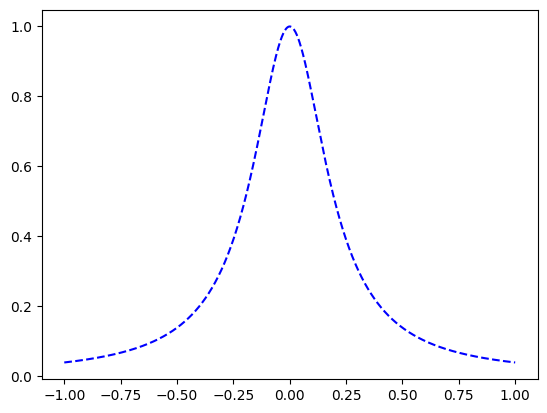

In [24]:
f =lambda x: 1/(1+25*(x**2))
x=np.linspace(-1,1,1000)
plt.plot(x,f(x),'b--')
plt.show()

In [25]:

N=4
n=N+1
x_=np.linspace(-1,1,n)
PL=lagrange(x_,f(x_))
xL=np.linspace(np.min(x_),np.max(x_))
PL,xL

(poly1d([ 3.31564987e+00,  1.04083409e-17, -4.27718833e+00,  5.20417043e-18,
         1.00000000e+00]),
 array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]))

In [26]:
a=np.array([4,8,12,16,20])
def lagrange2(a):
  for i in a:
    N=i
    n=N+1
    x_=np.linspace(-1,1,n)
    PL=lagrange(x_,f(x_))
    xL=np.linspace(np.min(x_),np.max(x_))
    print(PL[i])
lagrange2(a)

3.315649867374005
53.68930055458363
909.8755783140709
15403.084152347901
260178.63097171296


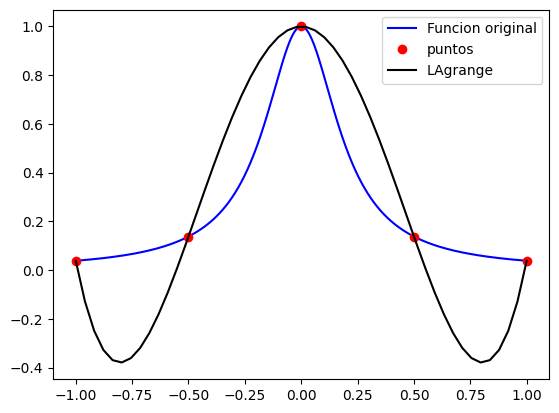

In [27]:
plt.plot(x,f(x),'b-',label='Funcion original')
plt.plot(x_,f(x_),'ro',label='puntos')
plt.plot(xL,PL(xL),'k-',label='LAgrange')
plt.legend()

#2

In [28]:
sp.init_printing()
f_s=lambda y: 1/(1+25*y**2)
y=sp.symbols('y')

In [29]:
f(y)

    1    
─────────
    2    
25⋅y  + 1

In [32]:
df_5=sp.diff(f_s(y),y,5)
f5=sp.lambdify(y,df_5,'numpy')


-0.20491603468558328

310353.0279713794


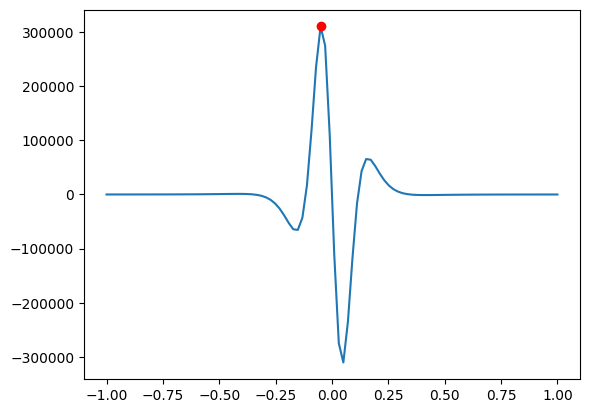

In [33]:
x5=np.linspace(-1,1,100)
plt.plot(x5,f5(x5))

x_max=np.max(abs(f5(x5)))
print(x_max)
x_zeta=np.argmax(abs(f5(x5)))
k=x5[x_zeta]
plt.plot(k,f5(k),"ro")
plt.show()

In [34]:
import math as m

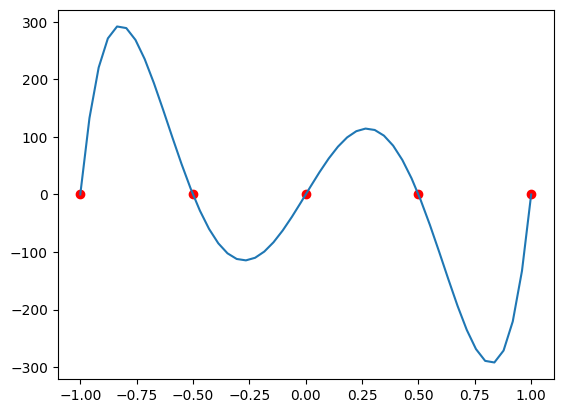

In [35]:
plt.plot(x_,f(x_),'ro')
plt.plot(xL,x_max/(m.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]))
plt.show()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

In [37]:
x1=np.linspace(-np.pi/4,np.pi/4,10)
f1=lambda x1:np.tan(x1)

f1(x1)


array([-1.        , -0.70020754, -0.46630766, -0.26794919, -0.08748866,
        0.08748866,  0.26794919,  0.46630766,  0.70020754,  1.        ])

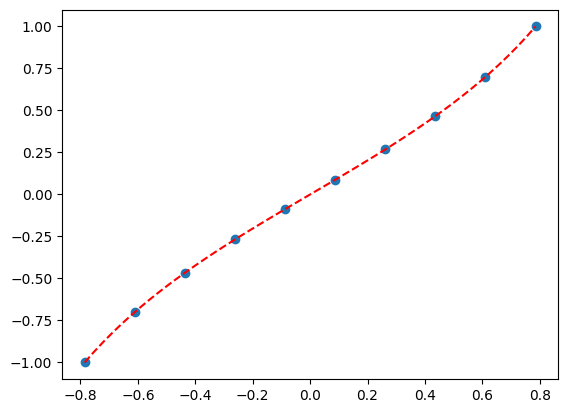

In [44]:
N = 9
n = N + 1
x1=np.linspace(-np.pi/4,np.pi/4,n)
plt.plot(x1,f1(x1), "o")
xla = np.linspace(np.min(x1),np.max(x1))
lagrange3=lagrange(x1,f1(x1))

plt.plot(xla,lagrange3(xla), "r--")
plt.show()

In [45]:
import sympy as sp
sp.init_printing()

f_tan = lambda y: sp.tan(y)
y = sp.symbols("y")


In [46]:
dff = sp.diff(f_tan(y),y,10)
f_de = sp.lambdify(y,dff, "numpy")
x2 = np.linspace(-np.pi/4,np.pi/4,100)
x2_max = np.max(abs(f_de(x2)))
x2_max

51733503.999999955

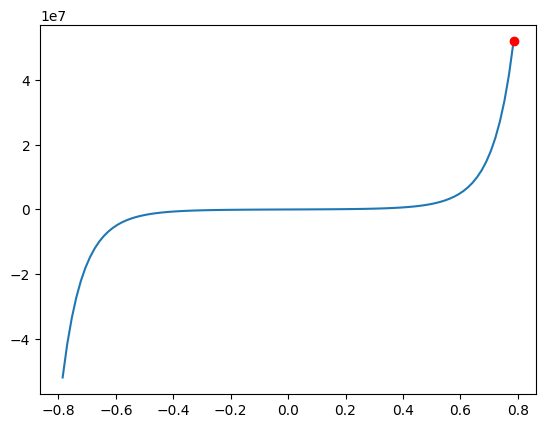

In [48]:
plt.plot(x2,f_de(x2))
x_zeta = np.argmax(abs(f_de(x2))) #posicion delmaximo
xabs = abs(x2[x_zeta]) #punto x donde miro la funcion
plt.plot(xabs,f_de(xabs),"ro")
plt.show()


##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [50]:
import pandas as pd


In [51]:
x = np.array([1,1.3,1.6,1.9,2.2])
f_x = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])


df = pd.DataFrame({"Valores x": x, "Valores fx": f_x})
df

,Valores x,Valores fx
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


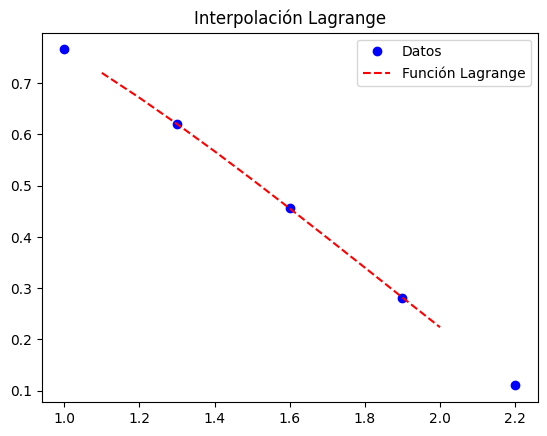

In [53]:
x = np.array([1,1.3,1.6,1.9,2.2])
f_x = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])
new_x_range = np.arange(1.1, 2.1, 0.1)
lagrange4= lagrange(x,f_x)
plt.plot(x,f_x,"bo", label="Datos")

plt.plot(new_x_range,lagrange4(new_x_range),"r--", label="Función Lagrange")
plt.legend()
plt.title("Interpolación Lagrange")
plt.show()

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3])
y=([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

len(x)

21

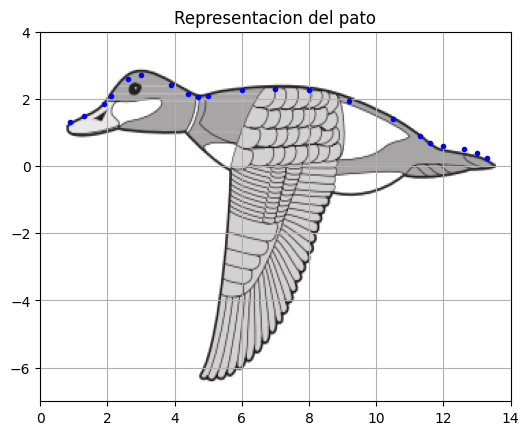

In [ ]:
import urllib.request
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato


plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))
plt.plot(x,y,'.b')
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()

In [ ]:
lagrange?


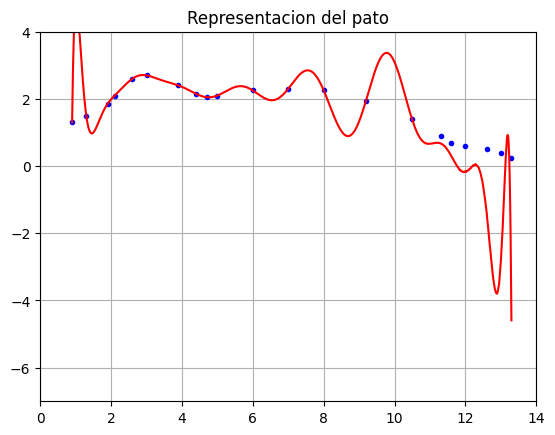

In [ ]:
XL=np.linspace(np.min(x),np.max(x),1000)
LG=lagrange(x,y)
plt.figure()
plt.title('Representacion del pato')
plt.plot(x,y,'.b')
plt.plot(XL,LG(XL),'r')
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()


In [ ]:
from scipy.interpolate import CubicSpline

In [ ]:
P_cub=CubicSpline(x,y)
x_cubi=np.arange(0.9,14,0.001)

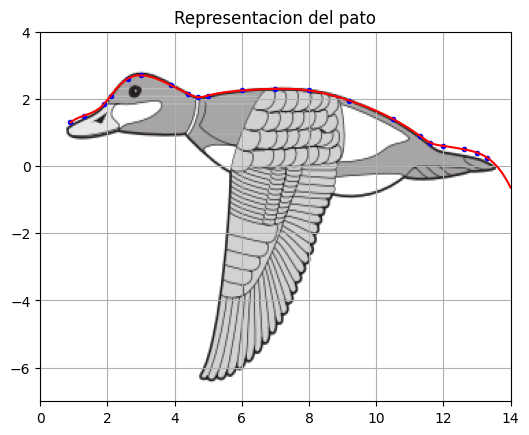

In [ ]:
plt.figure()
plt.title('Representacion del pato')
plt.plot(x,y,'.b')
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.35))
plt.plot(x_cubi,P_cub(x_cubi),'r')
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()